<h1>Traml Slider for Sputtered CdTe Films.</h1>
<h3>Single film of CdTe on OptiWhite substrate</h3>
<p><ul>
  <li>Power: 60 W</li>
  <li>Pressure: 5 mTorr</li>
  <li>Temp : 150 degC</li>
  <li>Time: 30 min</li>
  <li>Rotation: On</li>
</ul></p>


In [2]:
%pylab inline
import os, sys
sys.path.append("../")
import traml #TMM script
import db
import csv
import datarip


Populating the interactive namespace from numpy and matplotlib


In [3]:
a = traml.Stack() #create new stack object, default SLG substrate

In [4]:
a.library.search('CdTe') #search for a ZnO film as an example

|     ID | SHELF   | BOOK   | PAGE        | DESCRIPTION                    |
|--------+---------+--------+-------------+--------------------------------|
| 116901 | main    | CdTe   | DeBell-300K | DeBell et al. 1979: n 6-22 µm; |
| 116902 | main    | CdTe   | DeBell-80K  | DeBell et al. 1979: n 6-22 µm; |
| 116903 | main    | CdTe   | DeBell-20K  | DeBell et al. 1979: n 6-22 µm; |
| 116904 | main    | CdTe   | Marple      | Marple 1964: n 0.86-2.5 µm     |
| 116905 | main    | CdTe   | Treharne    | Treharne et al. 2011: Thin fil |


In [5]:
a.add(116905)
a.table()

|   # |     ID | Material   | Thickness (nm)   | Type      |
|-----+--------+------------+------------------+-----------|
|   0 | 301005 | soda-lime  | --               | substrate |
|   1 | 116905 | CdTe       | 100              | passive   |


In [6]:
data = datarip.data_dict('CdTe_1.csv')

In [18]:
def getTR(stack):
    '''Get T and R for stack'''
    T = stack.get_T()
    R = stack.get_R()
    x = stack.x
    return x, real(T), real(R)

In [39]:
def plot(d):
    '''Plot T and R for a stack with a single film of thickness d'''
    
    fig = figure(figsize(9,7))
    ax = fig.add_subplot(111)
    
    stack = a
    stack.d(1, d) #change layer 1 thickness
    x, T, R = getTR(a)
    
    x_data = array(data.get('data', None)[0])/1000
    y_data = array(data.get('data'), None)[1]/100
    
    ax.plot(x, T, color='red', linewidth=3)
    #ax.plot(x, R, color='blue', linewidth=3)
    ax.plot(x_data, y_data, 'o', markevery=10)
    ax.set_xlim([min(x), max(x)])
    ax.set_ylim([0,1])
    ax.set_xlabel('$\lambda$ ($\mu$m)', fontsize=20)
    ax.set_ylabel('T, R', fontsize=25)
    text(0.5, 0.5, 'd = {0}.0f nm'.format(d), fontsize=12)
    fig.savefig('CdTe_1.jpg')
    

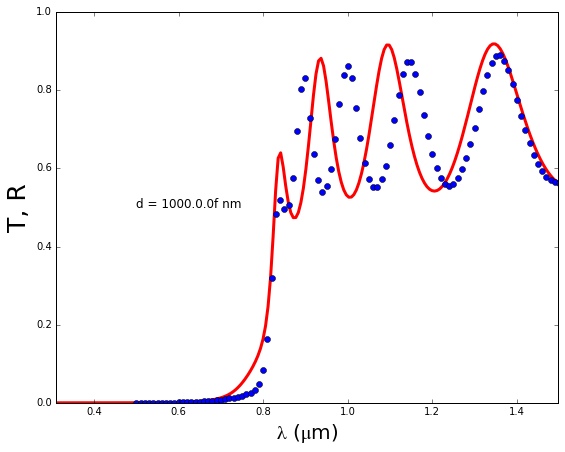

In [40]:
from ipywidgets import *
d_s = FloatSlider(min=1000, max=1300, step=1, value = 0)
interactive(plot,a=a,d=d_s)